In [1]:
from scipy import stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

# One-Sample independent T-Test

Было взвешено 200 мужчин. Средний вес популяции составляет 83.8 кг. Если ли стат значимая разница между выборкой из этих 20 мужчин и средней популяции?

In [2]:
# размер выборки - 200
# среднее выборки - 95
# отклонение - 10
man_array = stats.norm.rvs(size=200, loc=95, scale=10)

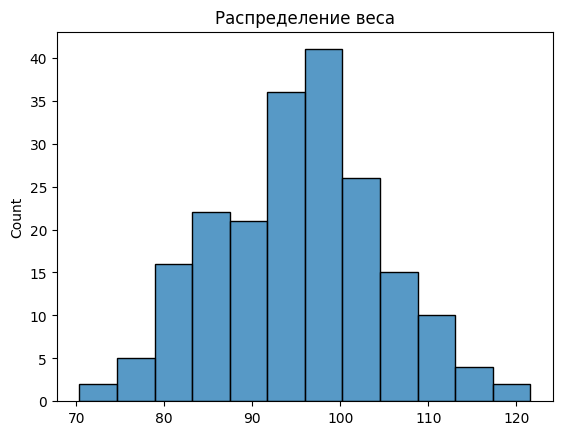

In [3]:
sns.histplot(man_array)
plt.title('Распределение веса')
plt.show()

In [4]:
poplutaion_mean = 83.8
_, p_value = stats.ttest_1samp(man_array, popmean=poplutaion_mean)

if p_value < 0.05:
    print(f'Вероятность получить подобную man_array выборку при среднем {poplutaion_mean} ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза отвергнута: средние не равны')
else:
    print(f'Вероятность получить подобную man_array выборку при среднем {poplutaion_mean}' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза не отвергается: средние равны')

Вероятность получить подобную man_array выборку при среднем 83.8 составляет 0.0000
Нулевая гипотеза отвергнута: средние не равны


# Two-Sample Independent T-Test

Были установлены зарплаты разработчиков одной компании, но на находящихся в разных городах. Есть ли разница в зарплатах?

In [5]:
scranton_branch = stats.norm.rvs(size=100, loc=85, scale=15)
ny_branch = stats.norm.rvs(size=100, loc=100, scale=20)

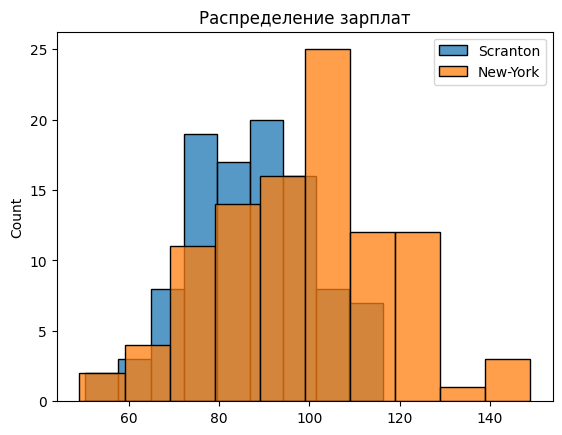

In [6]:
sns.histplot(scranton_branch, label='Scranton')
sns.histplot(ny_branch, label='New-York')
plt.legend()
plt.title('Распределение зарплат')
plt.show()

In [7]:
_, p_value = stats.ttest_ind(scranton_branch, ny_branch, equal_var=False)
if p_value < 0.05:
    print('Нулевая гипотеза отвергнута: зарплаты веток статистически различаются')
else:
    print('Нулевая гипотеза не отвергается: зарплаты статистически не различаются')

Нулевая гипотеза отвергнута: зарплаты веток статистически различаются


# Paired T-Test

Записавшимся в фитнес клуб предлагается универсальная программа похудения, которая подходит всем и помогает сбросить 10кг за месяц. Был измерян их вес до начала программы и спустя 1 месяц. Статистически ли значимы резлуьтаты программы?

In [8]:
weights_before = stats.norm.rvs(size=20, loc=100, scale=10)
weights_after = weights_before - np.random.randint(2, 10, size=20)

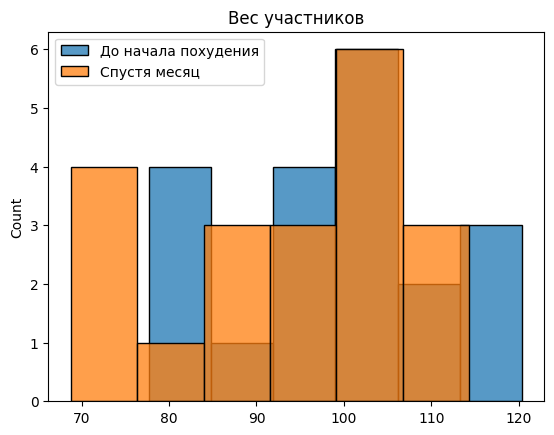

In [9]:
sns.histplot(weights_before, label='До начала похудения')
sns.histplot(weights_after, label='Спустя месяц')
plt.legend()
plt.title('Вес участников')
plt.show()

In [10]:
# на сколько должны похудеть
weight_diff = 10
_, p_value = stats.ttest_1samp(weights_after - weights_before, weight_diff)
if p_value < 0.05:
    print('Нулевая гипотеза отвергнута: разница в весе статистически значима. Программа эффективна')
else:
    print('Нулевая гипотеза не отвергается: разница в весе статистически не значима. Программа не эффективна')

Нулевая гипотеза отвергнута: разница в весе статистически значима. Программа эффективна


In [11]:
# второй вариант
_, p_value = stats.ttest_rel(weights_after, weights_before)
if p_value < 0.05:
    print('Нулевая гипотеза отвергнута: разница в весе статистически значима. Программа эффективна')
else:
    print('Нулевая гипотеза не отвергается: разница в весе статистически не значима. Программа не эффективна')

Нулевая гипотеза отвергнута: разница в весе статистически значима. Программа эффективна


# One-Way ANOVA

Было взято по 10 людей из каждой возрастной группы (до 18, 18-30, 30-50, старше 50), для проверки времени их пребывания в интернете. Равны ли группы между собой по среднему пребыванию в интернете?

In [12]:
four_groups = []

for i in range(4):
    time = stats.norm.rvs(size=10, scale=5, loc=np.random.randint(720,750))
    four_groups.append(time)

first_group = four_groups[0]
second_group = four_groups[1]
third_group = four_groups[2]
fourth_group = four_groups[3]

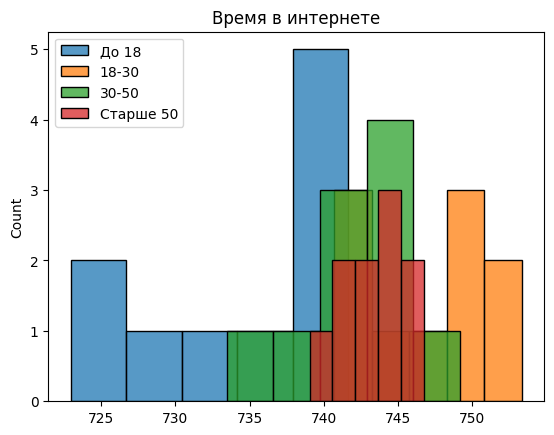

In [13]:
sns.histplot(first_group, label='До 18')
sns.histplot(second_group, label='18-30')
sns.histplot(third_group, label='30-50')
sns.histplot(fourth_group, label='Старше 50')
plt.legend()
plt.title('Время в интернете')
plt.show()

In [14]:
_, p_value = stats.f_oneway(
                            first_group,
                            second_group,
                            third_group,
                            fourth_group
                        )
if p_value < 0.05:
    print('Нулевая гипотеза отвергнута: минимум одна из групп отлична от других по времени пребывания в интернете')
else:
    print('Нулевая гипотеза не отвергается: все группы, в среднем, проводят одинаковое количество времени в интернете')

Нулевая гипотеза отвергнута: минимум одна из групп отлична от других по времени пребывания в интернете


# Two-Way ANOVA

Ученые решили установить, влияет ли частый полив и внесение удобрений на рост растений. Измерения были проведены до начала эксперимента и спустя полгода

In [15]:
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15), 
                          'Watering': np.repeat(['daily', 'weekly'], 15), 
                          'height': [14, 16, 15, 15, 16, 13, 12, 11, 14,  
                                     15, 16, 16, 17, 18, 14, 13, 14, 14,  
                                     14, 15, 16, 16, 17, 18, 14, 13, 14,  
                                     14, 14, 15]})

In [16]:
dataframe

,Fertilizer,Watering,height
0,daily,daily,14
1,daily,daily,16
2,daily,daily,15
3,daily,daily,15
4,daily,daily,16
5,daily,daily,13
6,daily,daily,12
7,daily,daily,11
8,daily,daily,14
9,daily,daily,15


In [17]:
model = ols( 
    'height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)', data=dataframe).fit() 
result = sm.stats.anova_lm(model, typ=2)

In [18]:
result_value = any(list(map(lambda x: x < 0.05, result['PR(>F)'].dropna().values)))

In [19]:
result

,sum_sq,df,F,PR(>F)
C(Fertilizer),0.043155,1.0,0.015625,0.901417
C(Watering),0.043155,1.0,0.015625,0.901417
C(Fertilizer):C(Watering),0.033333,1.0,0.012069,0.913305
Residual,77.333333,28.0,NaN,NaN


In [20]:
if not result_value:
    print('Нулевая гипотеза не отвергается: нет статистически важной разницы в росте растений '\
          'при смене частоты полива/внесения удобрений')
else:
    print('Нулевая гипотеза отвергается: один из фактор статистически значимо влияет на рост растений')

Нулевая гипотеза не отвергается: нет статистически важной разницы в росте растений при смене частоты полива/внесения удобрений


# НЕПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

# Знаково-ранговый тест Wilcoxon'а

В рамках исследования влияния изменения климата на дождевые леса был проведен ряд исследований. Одно из них - подсчет кладок яиц кайманов в установленных точках, на которых проводилось первое измерение в начала 2000х годов.

In [25]:
# к данным нет требований несмещенности и нормальности
first_obesrv = np.random.randint(15, 40, size=40)
last_obesrv = np.random.randint(5, 40, size=40)

In [26]:
_, p_value = stats.wilcoxon(first_obesrv, last_obesrv)

if p_value < 0.05:
    print(f'Нулевая гипотеза отвергнута: выборки различны.')
else:
    print(f'Нулевая гипотеза не отвергнута: выборки не отличаюся.')

Нулевая гипотеза отвергнута: выборки различны.


Влияние климата на репродуктивность самок кайманов статистически значимо

# Kruskal-Wallis Test

Трем группам людей, по 90 человек каждая, давали лекарство от боли суставов. Одна группа - контрольная, вторая - традиционные лекарства, третья - экспериментальное лекарство. После недели приема наблюдаемым было предложено оценит уровень боли по шкале от 0 до 100. Есть ли вообще эффект от лечения?

In [27]:
first_group = np.random.randint(40, 90, size=30)
second_group = np.random.randint(52, 90, size=30)
third_group = np.random.randint(20, 80, size=30)

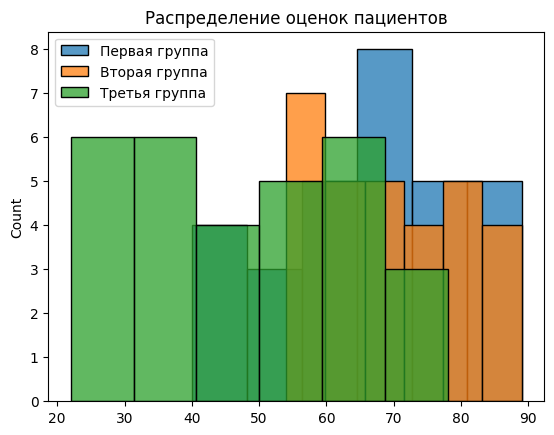

In [28]:
sns.histplot(first_group, label='Первая группа')
sns.histplot(second_group, label='Вторая группа')
sns.histplot(third_group, label='Третья группа')
plt.title('Распределение оценок пациентов')
plt.legend()
plt.show()

In [29]:
_, p_value = stats.kruskal(first_group, second_group, third_group)

if p_value < 0.05:
    print(f'Вероятность получить подобные результаты, если медианы групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза отвергнута: выборки отличаются')
else:
    print(f'Вероятность получить подобные результаты, если медианы групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза не отвергается: выборки не отличаются')

Вероятность получить подобные результаты, если медианы групп не различаются составляет 0.0000
Нулевая гипотеза отвергнута: выборки отличаются


# Friedman Test

На студентах решили опробовать программу, чтобы установить, как будут меняться оценки в течение трех недель

In [111]:
first_week = np.random.randint(70,96, size=100)
second_week = np.random.randint(75,101, size=100)
third_week = np.random.randint(81,101, size=100)

In [112]:
_, p_value = stats.friedmanchisquare(first_week, second_week, third_week)

if p_value < 0.05:
    print(f'Вероятность получить подобные результаты, если медианы групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза отвергнута: выборки отличаются, показатели изменились')
else:
    print(f'Вероятность получить подобные результаты, если медианы групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза не отвергается: показатели не изменились')

Вероятность получить подобные результаты, если медианы групп не различаются составляет 0.0000
Нулевая гипотеза отвергнута: выборки отличаются, показатели изменились


# Mann-Whitney U-Test

На бейсбольном матче проводилась маркетинговая акция по определению лучшего напитка: выбор между Coca-Cola и абсолютно новой колой. Тест был слепой, и люди оценивали напиток, основываясь только на вкусовых качествах, выставляя оценки от 1 до 5. Есть ли разница между колами? Какая лучше?

In [30]:
coca_cola = np.random.randint(1, 6, size=3000)
new_cola = np.random.randint(2, 5, size=3000)

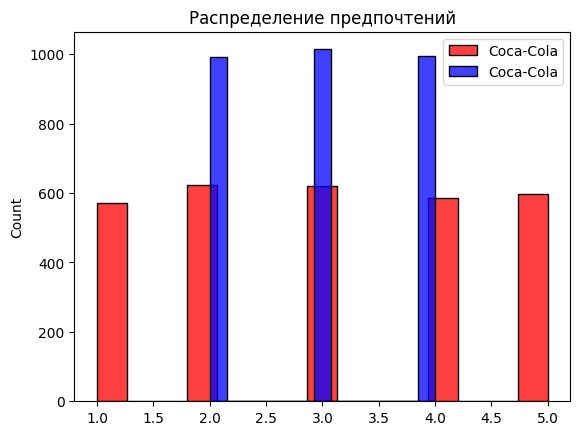

In [31]:
sns.histplot(coca_cola, label='Coca-Cola', color='red')
sns.histplot(new_cola, label='Coca-Cola', color='blue')
plt.title('Распределение предпочтений')
plt.legend()
plt.show()

In [32]:
_, p_value = stats.mannwhitneyu(coca_cola, new_cola, alternative='two-sided', use_continuity=False)

if p_value < 0.05:
    print(f'Вероятность получить подобные результаты, если медианы групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза отвергнута: выборки отличаются')
else:
    print(f'Вероятность получить подобные результаты, если медианы групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза не отвергается: выборки не отличаются')

Вероятность получить подобные результаты, если медианы групп не различаются составляет 0.9561
Нулевая гипотеза не отвергается: выборки не отличаются


# СВЯЗЬ МЕЖДУ ПЕРЕМЕННЫМИ

## Корреляция Пирсона (параметрический тест)

Вес человека коррелирует с его ростом

In [33]:
# предполагается нормальнное распределение и неслучайные совокупности (логичны)
height = stats.norm.rvs(size=20, loc=170, scale=10) 
weight = height - np.random.randint(100, 120, size=20)

In [34]:
corr, _ = stats.pearsonr(height, weight)
print(f'Корреляция составляет {corr:.4f}')

Корреляция составляет 0.8322


## Корреляция Спирмана (непараметрический тест)

Есть предположение, что чем дальше от источника воды находится магазин, тем дороже в нем питьевая вода.

In [35]:
distance = np.arange(10, 101, 10)
price = [*np.random.randint(1,3, size=3)] + [*np.random.randint(2,4, size=4)] + [*np.random.randint(3,5, size=3)]

In [36]:
corr, p_value = stats.pearsonr(distance, price)

if p_value < 0.05:
    print(f'Нулевая гипотеза отвергнута: корреляция равна {corr:.4f}')
else:
    print(f'Нулевая гипотеза не отвергнута: между данными нет связи, корреляция равна {corr:.4f}')

Нулевая гипотеза отвергнута: корреляция равна 0.7597


Цена действительно пропорциональная дальности нахождения магазина от источника воды

## Корреляция Кендалла (непараметрический)

Два критика выставили оценку одному ресторану. Похожи ли оценки экспертов? Есть ли между ними согласие?

In [37]:
first_yelper = [1, 2, 3, 4, 5, 6, 7] 
second_yelper = [1, 3, 6, 2, 7, 4, 5]    

In [38]:
corr, p_value = stats.kendalltau(first_yelper, second_yelper)
if p_value < 0.05:
    print(f'Нулевая гипотеза отвергнута: отзывы критиков похожи. Корреляция равна {corr:.4f}')
else:
    print(f'Нулевая гипотеза не отвергнута: отзывы критиков различаются. Корреляция равна {corr:.4f}')

Нулевая гипотеза не отвергнута: отзывы критиков различаются. Корреляция равна 0.4286


# Хи-Квадрат (Chi-Square)

При проведение маркетингового исследования было установлено что 350 девушек, купивших зерновой кофе, такупило также пирожные, 100 девушек купило ликер, 250 купило мороженое. Для мужчин это распределение составляет 260, 140, 200. Можно ли сказать, что вкусовые предпочтения в данном случае зависят от пола?

In [39]:
data = pd.DataFrame(data={
    'women': [350, 100, 250],
    'men': [260, 140, 200]
    },
    index=['cake', 'liquor', 'ice_cream']
)

In [40]:
_, p_value, *_ = stats.chi2_contingency(data)

print(f'Вероятность получить подобные рспределения при схожести переменных - {p_value:.4f}')
if p_value < 0.05:
    print(f'Нулевая гипотеза отвергнута: переменные различаются между собой.')
    print('Вкусовые предпочтения зависят от пола')
else:
    print(f'Нулевая гипотеза не отвергнута: переменные не различаются между собой.')
    print('Вкусовые предпочтения не зависят от пола')

Вероятность получить подобные рспределения при схожести переменных - 0.0001
Нулевая гипотеза отвергнута: переменные различаются между собой.
Вкусовые предпочтения зависят от пола


# Fisher Test

Предполагается, что доля курящих людей до 18 лет среди мужского населения преобладает над женским.

In [41]:
data = pd.DataFrame(data={'boy': [50, 43], 'girl': [30, 21]}, index=['Non-Smoke', 'Smoke'])
data

,boy,girl
Non-Smoke,50,30
Smoke,43,21


In [42]:
_, p_value = stats.fisher_exact(data, alternative='two-sided')

if p_value < 0.05:
    print(f'Вероятность получить подобные результаты, если дисперсии групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза отвергнута: дисперсии не равны')
else:
    print(f'Вероятность получить подобные результаты, если дисперсии групп не различаются ' \
          f'составляет {p_value:.4f}')
    print('Нулевая гипотеза не отвергается: дисперсии равны')

Вероятность получить подобные результаты, если дисперсии групп не различаются составляет 0.6018
Нулевая гипотеза не отвергается: дисперсии равны


Нет статистически значимой разницы по числу курящих в зависимости от пола

# McNemar Test

Необходимо установить, повысилась ли самооценка людей после прохождения курса у психолога

In [91]:
con_table = pd.DataFrame(data={'Принимаю себя': [100, 200], 'Не принимаю себя': [150, 150]},
                         index=['До курса', 'После курса'])
con_table

,Принимаю себя,Не принимаю себя
До курса,100,150
После курса,200,150


In [92]:
from statsmodels.stats.contingency_tables import mcnemar
result = mcnemar(con_table)
pvalue = result.pvalue

if pvalue > 0.05:
    print('Нулевая гипотеза не отвергнута, выборки не отличаются, эффекта от курсов нет')
else:
    print('Нулевая гипотеза отвергнута, эффекта от курсов есть')

Нулевая гипотеза отвергнута, эффекта от курсов есть


# Cochran Q Test

Решено проверить, увеличиваются ли силовые показатели при введении 20% и 50% от стероидной сыворотки у одних и тех же людей

In [102]:
# увлечение показаталей при введении 20% стероидов
twenty = np.random.binomial(1, p=0.3, size=200)
# сводная таблица
con_table = pd.DataFrame(
    data={
        '20%': twenty,
        '50%': np.clip(0,1, twenty + np.random.binomial(1, p=0.15, size=200))
    }
)
con_table

,20%,50%
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
195,0,0
196,0,0
197,0,0
198,0,0


In [103]:
from statsmodels.sandbox.stats.runs import cochrans_q
_, p_value = cochrans_q(con_table)

if pvalue > 0.05:
    print('Нулевая гипотеза не отвергнута, выборки не отличаются, изменение показателей не статистически важно')
else:
    print('Нулевая гипотеза отвергнута, изменение силовых показателей  статистически важно')

Нулевая гипотеза отвергнута, изменение силовых показателей  статистически важно


C:\Users\cripe\miniconda3\lib\site-packages\statsmodels\sandbox\stats\runs.py:480: FutureWarning: Deprecated, use stats.cochrans_q instead
  warnings.warn("Deprecated, use stats.cochrans_q instead", FutureWarning)


## Односторонний Хи-Квадрат

Мальчик начал заниматься легкой атлетикой и решил проверить, насколько он лучше остальных в подтягиваниях.  
Ниже приведен вектор подтягиваний. Есть ли статистическая разница между детьми?

In [75]:
kids = [17, 10, 11, 10, 9, 8, 12, 7]

_, pvalue = stats.chisquare(kids, ddof=1)
if pvalue > 0.05:
    print('Нулевая гипотеза не отвергнута, разница в подтягиваниях не статитстически значима')
else:
    print('Нулевая гипотеза отвергнута, разница в подтягиваниях статитстически значима')

Нулевая гипотеза не отвергнута, разница в подтягиваниях не статитстически значима


# Множественные тесты

## Tukey Test (Honest Significant Difference / HSD)

Есть ли разница между продажами крупных лейблов?

In [60]:
labels = ['Sony', 'WB', 'Jam', 'Universal']
sale_data = pd.DataFrame(columns=['label', 'sales'])
for label in labels:
    
    sales_count = [label] * 100 * len(label)
    sales_numbers = np.random.randint(10000, 10000 * len(label), size=len(sales_count))
    data = {'label': sales_count, 'sales': sales_numbers}
    
    data = pd.DataFrame(data=data)
    sale_data = pd.concat((sale_data, data))

In [61]:
# есть ли разница между лейблами
# проходим по уникальным лейблам и забираем значения продаж
_, pvalue = stats.f_oneway(*[sale_data[sale_data['label'] == col]['sales'].values for col in sale_data['label'].unique()])

if pvalue < 0.05:
    print('Есть различие в продажах')

Есть различие в продажах


Мы нашли различие, но какая группа отлична?

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as hsd

tukey = hsd(endog=sale_data['sales'].astype('float'), groups=sale_data['label'], alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1    group2    meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------------
      Jam      Sony     5342.92 0.0002    2031.097   8654.743   True
      Jam Universal  30381.4989   -0.0  27490.7028  33272.295   True
      Jam        WB   -4474.075 0.0194  -8432.4606  -515.6894   True
     Sony Universal  25038.5789   -0.0  22432.8505 27644.3073   True
     Sony        WB   -9816.995    0.0 -13572.2493 -6061.7407   True
Universal        WB -34855.5739   -0.0 -38245.3328 -31465.815   True
--------------------------------------------------------------------


p-adj - уровень значимости, в нашем случае все значения меньше 0.05. Это значит, что продажи всех лейблов статистически значимо различаюстя между собой

## Поправки Бонферрони и Холма

Множественная проверка гипотез приводит к вероятности ошибки I рода по формуле (1 - (1-alpha)) * n, где n - число проверок, а alpha - уровень значимости. Так для 5 проверок вероятность ошибки первого рода 1 - 0.95 * 5 = 0.25

In [63]:
# pvaleus из прошлой задачи
pvalues = tukey.pvalues

In [64]:
pvalues

array([ 2.05003265e-04, -5.08482145e-14,  1.93617173e-02, -5.08482145e-14,
        1.43663970e-10, -5.08482145e-14])

In [65]:
from statsmodels.sandbox.stats.multicomp import multipletests
multipletests(pvalues, alpha=0.05,  method='bonferroni')

(array([ True,  True, False,  True,  True,  True]),
 array([ 1.23001959e-03, -3.05089287e-13,  1.16170304e-01, -3.05089287e-13,
         8.61983818e-10, -3.05089287e-13]),
 0.008512444610847103,
 0.008333333333333333)

False для третьего p_value, который после поправки равен 0.1726. Таким образом, мы не можем отвергнуть нулевую гипотезу о том, что разницы между продажами Jam и WB нет. Таким образом, в 17,26% случаев мы получим одинаковые результаты продаж, т.к. выборки принадлежат одному распределению

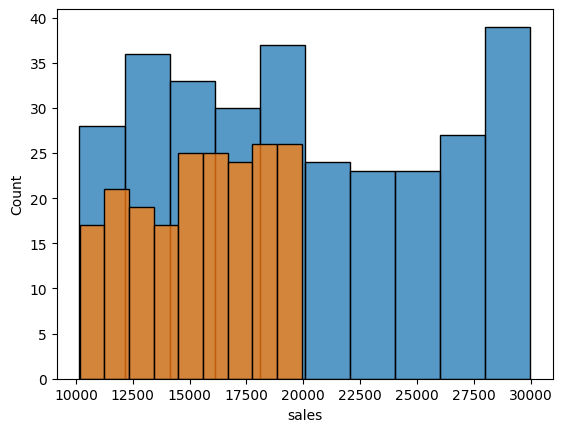

In [66]:
sns.histplot(sale_data.loc[sale_data['label']=='Jam', 'sales'], label='Sony')
sns.histplot(sale_data.loc[sale_data['label']=='WB', 'sales'], label='WB')
plt.show()

Но на графике видно, что выборки различаются между собой. Попробуем другой метод, поправку Холма

In [67]:
multipletests(pvalues, alpha=0.05,  method='holm')

(array([ True,  True,  True,  True,  True,  True]),
 array([ 4.10006531e-04, -3.05089287e-13,  1.93617173e-02, -2.54241073e-13,
         4.30991909e-10, -2.03392858e-13]),
 0.008512444610847103,
 0.008333333333333333)

В данном случае, поправка Холма говорит, что все дял каждого наблюдения нулевая гипотеза моджет быть отвергнута

# ЗАДАЧИ

In [117]:
# one-sample ttest
# количество кДЖ, употребленных девушками в течение дня
kdj = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

# рекомендованная норма
normal = 7725

# есть ли отклонение от нормы?

_, pvalue = stats.ttest_1samp(kdj, normal)

if pvalue > 0.05:
    print('Статистически значимого отклонения от нормы нет')
else:
    print('Статистически значимое отклонение от нормы есть')

Статистически значимое отклонение от нормы есть


In [127]:
# независимый ttest

# есть неспортивные и спортивные пациенты
lazy = [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86]
sport = [64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54]

# есть ли статистическая разница в весе?
_, pvalue = stats.ttest_ind(lazy, sport, equal_var=False)
if pvalue > 0.05:
    print('Вес значимо не отличается')
else:
    print('Вес отличается')

Вес отличается


In [131]:
# проверка нормальности
_, lazy_pvalue = stats.shapiro(lazy)
_, sport_pvalue = stats.shapiro(sport)

if lazy_pvalue > 0.05:
    print('Распределение неспортивных распределено нормально')
else:
    print('Распределение ненормально')
    
if sport_pvalue > 0.05:
    print('Распределение спортивных распределено нормально')
else:
    print('Распределение ненормально')

Распределение неспортивных распределено нормально
Распределение спортивных распределено нормально


In [137]:
# проверка непараметрическим тестом one-tail
# тяжелее ли неспортивные чем спортивные?
_, pvalue = stats.mannwhitneyu(lazy, sport, alternative='less')

if pvalue > 0.05:
    print(f'При бесконечном семплировании данных из их распределений, вторая выборка в {pvalue * 100:.2f}% случаев')
    print('будет меньше первой')
else:
    print(f'При бесконечном семплировании данных из их распределений, вторая выборка только в {pvalue * 100:.2f}% случаев')
    print('будет меньше первой')

При бесконечном семплировании данных из их распределений, вторая выборка в 96.47% случаев
будет меньше первой
